In [2]:
def get_percentage_decrease_json(json, min_key=1024):
    min_val = json[min_key]['wer']
    out = {}
    for key in json:
        if key != min_key:
            out[key] = (min_val - json[key]['wer']) / min_val * 100
    return out

def get_data(df, dataset='earnings22', split='test', return_all=False):
    seq_lens = df.loc[df['dataset'] == dataset].loc[df['split'] == split]['seq_len'].unique()
    print(seq_lens)

    out_data = {}
    for seq_len in seq_lens:
        sset = df.loc[df['dataset'] == dataset].loc[df['split'] == split].loc[df['seq_len'] == seq_len]
        if not return_all:
            out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
        else:
            out_data[seq_len] = [el*100 for el in sset['wer'].tolist()]
        if len(sset) != 3:
            print(f'Sequence length {seq_len} has {len(sset)} results')
    return out_data


In [3]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [4]:
!ls

eval.ipynb			     evals_rb_rev16_gnoise_m5_15SNR.csv
evals_fourier_pos.csv		     evals_rotary_10k.csv
evals_no_rotary.csv		     evals_rotary_pos_12l_256d.csv
evals_rb_12h.csv		     evals_rotary_pos_3l.csv
evals_rb_24h.csv		     evals_rotary_pos_6l_256d.csv
evals_rb_3l_2048d.csv		     model_sizes.pdf
evals_rb_9l_768d.csv		     old
evals_rb.csv			     rev16_noise.pdf
evals_rb_rev16_bnoise_5_SNR.csv      wer_head_size_earnings.pdf
evals_rb_rev16_bnoise.csv	     wer_pos_earnings.pdf
evals_rb_rev16_bnoise_m5_SNR.csv     werr_rb_across_datasets.pdf
evals_rb_rev16_gnoise_0_20SNR.csv    werr_rev16_bnoise.pdf
evals_rb_rev16_gnoise_m10_10SNR.csv


In [5]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
Sequence length 1024 has 2 results
Sequence length 32768 has 2 results
Sequence length 65536 has 2 results
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
Sequence length 360000 has 1 results
[  2048   4096  16384  32768   1024   8192  65536 131072]
Sequence length 1024 has 2 results
Sequence length 65536 has 2 results
Sequence length 131072 has 2 results


/tmp/ipykernel_14662/1618002130.py:42: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


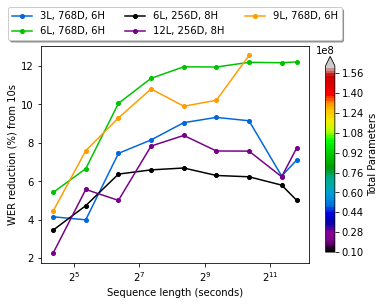

In [6]:
csv1 = pd.read_csv('evals_rotary_pos_3l.csv', sep=',')
csv2 = pd.read_csv('evals_rb.csv', sep=',')
csv3 = pd.read_csv('evals_rotary_pos_6l_256d.csv', sep=',')
csv4 = pd.read_csv('evals_rotary_pos_12l_256d.csv', sep=',')
csv5 = pd.read_csv('evals_rb_9l_768d.csv', sep=',')



from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

params = [
    49158656, # 3l
    89914112, # rb
    11979008, # 6l 256d
    21061376, # 12l 256d
    130669568, # 9l 768d
]
param_min, param_max = min(params), 160000000#max(params)
step = 2000000
boundaries = [param_min-step]+[d+step for d in range(param_min, param_max+1, step)]
cm = plt.get_cmap('nipy_spectral')
#cm = cm.reversed()
norm = BoundaryNorm(boundaries, 256)
colors = [cm(norm(p)) for p in params]


dataset = 'earnings22_full'
data1 = get_data(csv1, dataset=dataset)
data2 = get_data(csv2, dataset=dataset)
data3 = get_data(csv3, dataset=dataset)
data4 = get_data(csv4, dataset=dataset)
data5 = get_data(csv5, dataset=dataset)
# data5[65536]['wer'] = 23.0

pdecrease1 = get_percentage_decrease_json(data1, min_key=1024)
pdecrease2 = get_percentage_decrease_json(data2, min_key=1024)
pdecrease3 = get_percentage_decrease_json(data3, min_key=1024)
pdecrease4 = get_percentage_decrease_json(data4, min_key=1024)
pdecrease5 = get_percentage_decrease_json(data5, min_key=1024)

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(list(pdecrease1.keys()))], [pdecrease1[el] for el in sorted(list(pdecrease1.keys()))], label='3L, 768D, 6H', marker='o', markersize=4, color=colors[0])
plt.plot([el/100 for el in sorted(list(pdecrease2.keys()))], [pdecrease2[el] for el in sorted(list(pdecrease2.keys()))], label='6L, 768D, 6H', marker='o', markersize=4, color=colors[1])   
plt.plot([el/100 for el in sorted(list(pdecrease3.keys()))], [pdecrease3[el] for el in sorted(list(pdecrease3.keys()))], '-', label='6L, 256D, 8H', marker='o', markersize=4, color=colors[2])
plt.plot([el/100 for el in sorted(list(pdecrease4.keys()))], [pdecrease4[el] for el in sorted(list(pdecrease4.keys()))], label='12L, 256D, 8H', marker='o', markersize=4, color=colors[3])
plt.plot([el/100 for el in sorted(list(pdecrease5.keys()))], [pdecrease5[el] for el in sorted(list(pdecrease5.keys()))], label='9L, 768D, 6H', marker='o', markersize=4, color=colors[4])

cb = plt.colorbar(ScalarMappable(norm, cm),shrink=0.9, extend='max')
cb.set_label('Total Parameters')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('model_sizes.pdf', bbox_inches='tight')
plt.show()


In [6]:
1.82*10**8

182000000.0

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]
[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]


/tmp/ipykernel_14662/1317560137.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


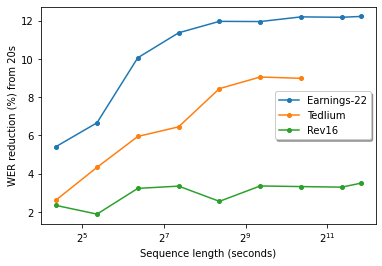

In [7]:
earnings_test = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='earnings22_full')
tedlium_test = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='tedlium')
rev16 = get_data(pd.read_csv('evals_rb.csv', sep=','), dataset='rev16')

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(earnings_test).keys())], [get_percentage_decrease_json(earnings_test)[key] for key in sorted(get_percentage_decrease_json(earnings_test).keys())], label='Earnings-22', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(tedlium_test).keys()) if el<=131072], [get_percentage_decrease_json(tedlium_test)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys()) if key<=131072], label='Tedlium', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(rev16).keys())], [get_percentage_decrease_json(rev16)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys())], label='Rev16', marker='o', markersize=4)

plt.legend(fancybox=True, shadow=True)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 20s')
plt.savefig('werr_rb_across_datasets.pdf', bbox_inches='tight') 
plt.show()

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_14662/317386364.py:6: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


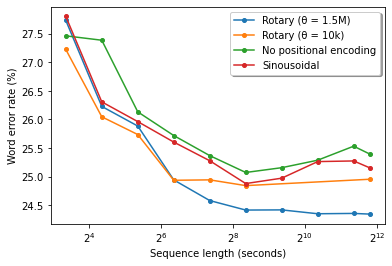

In [8]:
rotary_pos = get_data(pd.read_csv('evals_rb.csv', sep=','), split='test', dataset="earnings22_full")
rotary_base_pos = get_data(pd.read_csv('evals_rotary_10k.csv', sep=','), split='test', dataset="earnings22_full")
no_rotary = get_data(pd.read_csv('evals_no_rotary.csv', sep=','), split='test', dataset="earnings22_full")
sinousoidal_pos = get_data(pd.read_csv('evals_fourier_pos.csv', sep=','), split='test', dataset="earnings22_full")

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(rotary_pos.keys())], [rotary_pos[k]['wer'] for k in sorted(rotary_pos.keys())], label='Rotary (θ = 1.5M)', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(rotary_base_pos.keys())], [rotary_base_pos[k]['wer'] for k in sorted(rotary_base_pos.keys())], label='Rotary (θ = 10k)', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(no_rotary.keys())], [no_rotary[k]['wer'] for k in sorted(no_rotary.keys())], label='No positional encoding', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(sinousoidal_pos.keys())], [sinousoidal_pos[k]['wer'] for k in sorted(sinousoidal_pos.keys())], label='Sinousoidal', marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word error rate (%)')
plt.legend(fancybox=True, shadow=True)
plt.savefig('wer_pos_earnings.pdf', bbox_inches='tight')
plt.show()

In [9]:
csv5

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.244371,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,2048,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.246890,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,2048,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.238787,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,False,2048,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.231997,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,4096,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.236969,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,4096,0.875,SCConformerXL,-1
5,0,earnings22,dev,0.231362,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,False,4096,0.875,SCConformerXL,-1
6,0,earnings22,dev,0.221616,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,16384,0.875,SCConformerXL,-1
7,0,earnings22,dev,0.225274,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,32768,0.875,SCConformerXL,-1
8,0,earnings22,dev,0.229544,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,False,32768,0.875,SCConformerXL,-1
9,0,earnings22,test,0.186447,rb_n_seq_sched_9l_768d,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,2048,0.875,SCConformerXL,-1


In [10]:
pdsecrease7

NameError: name 'pdsecrease7' is not defined

[  4096   8192  16384  32768  65536 360000   2048 131072   1024 262144]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]


/tmp/ipykernel_14662/799744454.py:28: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


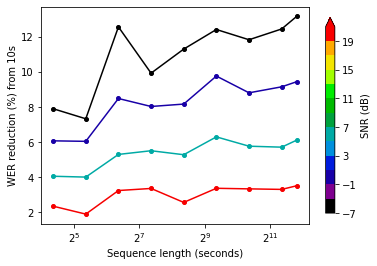

In [11]:

from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import math
csv1 = pd.read_csv('evals_rb.csv', sep=','  )
csv2 = pd.read_csv('evals_rb_rev16_bnoise.csv', sep=','  )
csv3 = pd.read_csv('evals_rb_rev16_bnoise_m5_SNR.csv', sep=','  )
csv4 = pd.read_csv('evals_rb_rev16_bnoise_5_SNR.csv', sep=','  )

data1 = get_data(csv1, dataset='rev16')
data2 = get_data(csv2, dataset='rev16_background_noise')
data3 = get_data(csv3, dataset='rev16_background_noise')
data4 = get_data(csv4, dataset='rev16_background_noise')

pdecrease1 = get_percentage_decrease_json(data1)
pdecrease2 = get_percentage_decrease_json(data2)
pdecrease3 = get_percentage_decrease_json(data3)
pdecrease4 = get_percentage_decrease_json(data4)

snrs = [math.inf, 0, -5, 5]
param_min, param_max = min(snrs), 20
step = 2
boundaries = [param_min-step]+[d+step for d in range(param_min, param_max+1, step)]
cm = plt.get_cmap('nipy_spectral')
#cm = cm.reversed()
norm = BoundaryNorm(boundaries, 220)
colors = [cm(norm(p)) for p in snrs]

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(list(pdecrease1.keys()))], [pdecrease1[el] for el in sorted(list(pdecrease1.keys()))], label='No background noise', marker='o', markersize=4, color=colors[0])
plt.plot([el/100 for el in sorted(list(pdecrease2.keys()))], [pdecrease2[el] for el in sorted(list(pdecrease2.keys()))], label='Background noise', marker='o', markersize=4, color=colors[1])
plt.plot([el/100 for el in sorted(list(pdecrease3.keys()))], [pdecrease3[el] for el in sorted(list(pdecrease3.keys()))], label='Background noise, -5 SNR', marker='o', markersize=4, color=colors[2])
plt.plot([el/100 for el in sorted(list(pdecrease4.keys()))], [pdecrease4[el] for el in sorted(list(pdecrease4.keys()))], label='Background noise, 5 SNR', marker='o', markersize=4, color=colors[3])

cb = plt.colorbar(ScalarMappable(norm, cm),shrink=0.9, extend='max')
cb.set_label('SNR (dB)')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('werr_rev16_bnoise.pdf', bbox_inches='tight')
plt.show()

In [ ]:
csv = pd.read_csv('evals_rb_rev16_gnoise_0_20SNR.csv', sep=',')  
csv2 = pd.read_csv('evals_rb.csv', sep=','  )
csv3 = pd.read_csv('evals_rb_rev16_bnoise.csv', sep=','  )
csv4 = pd.read_csv('evals_rb_rev16_gnoise_m5_15SNR.csv', sep=','  )
csv5 = pd.read_csv('evals_rb_rev16_gnoise_m10_10SNR.csv', sep=','  )
csv6 = pd.read_csv('evals_rb_rev16_bnoise_m5_SNR.csv', sep=','  )
csv7 = pd.read_csv('evals_rb_rev16_bnoise_5_SNR.csv', sep=','  )

data1 = get_data(csv, dataset='rev16_gaussian_noise', split='test')
data2 = get_data(csv2, dataset='rev16', split='test')
data3 = get_data(csv3, dataset='rev16_background_noise', split='test')
data4 = get_data(csv4, dataset='rev16_gaussian_noise', split='test')
data5 = get_data(csv5, dataset='rev16_gaussian_noise', split='test')
data6 = get_data(csv6, dataset='rev16_background_noise', split='test')
data7 = get_data(csv7, dataset='rev16_background_noise', split='test')

pdecrease1 = get_percentage_decrease_json(data1)
pdsecrease2 = get_percentage_decrease_json(data2)
pdsecrease3 = get_percentage_decrease_json(data3)
pdsecrease4 = get_percentage_decrease_json(data4)
pdsecrease5 = get_percentage_decrease_json(data5)
pdsecrease6 = get_percentage_decrease_json(data6)
pdsecrease7 = get_percentage_decrease_json(data7)

plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(pdecrease1.keys())], [pdecrease1[key] for key in sorted(pdecrease1.keys())], label='Gaussian (0 to 20 SNR)', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(pdsecrease3.keys())], [pdsecrease3[key] for key in sorted(pdsecrease3.keys())], label='Background Music (0 SNR)', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(pdsecrease2.keys())], [pdsecrease2[key] for key in sorted(pdsecrease2.keys())], label='No Noise', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(pdsecrease4.keys())], [pdsecrease4[key] for key in sorted(pdsecrease4.keys())], label='Gaussian (-5 to 15 SNR)', marker='o', markersize=4)
#plt.plot([el/100 for el in sorted(pdsecrease5.keys())], [pdsecrease5[key] for key in sorted(pdsecrease5.keys())], label='Gaussian (-10 to 10 SNR)', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(pdsecrease6.keys())], [pdsecrease6[key] for key in sorted(pdsecrease6.keys())], label='Background Music (-5 SNR)', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(pdsecrease7.keys())], [pdsecrease7[key] for key in sorted(pdsecrease7.keys())], label='Background Music (5 SNR)', marker='o', markersize=4)
#plt.legend(fancybox=True, shadow=True, loc='upper left', bbox_to_anchor=(0.5, 0.75), ncol=1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.275), ncol=2, fancybox=True, shadow=True)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 10s')
plt.savefig('rev16_noise.pdf', bbox_inches='tight')
plt.show()

[  1024   2048   4096   8192  16384  32768  65536 131072 262144 360000]
[  1024  32768  65536 131072 262144 360000   2048   4096   8192]
Sequence length 32768 has 2 results
Sequence length 2048 has 1 results
Sequence length 4096 has 2 results
Sequence length 8192 has 2 results
[  1024  32768  65536 131072 262144 360000]


/tmp/ipykernel_14662/1533900076.py:13: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


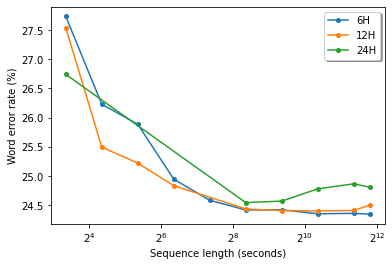

In [13]:
dataset = 'earnings22_full'

csv1 = pd.read_csv('evals_rb.csv', sep=','  )
data1 = get_data(csv1, dataset=dataset, split='test')

csv2 = pd.read_csv('evals_rb_12h.csv', sep=',')
data2 = get_data(csv2, dataset=dataset, split='test')

csv3 = pd.read_csv('evals_rb_24h.csv', sep=',')
data3 = get_data(csv3, dataset=dataset, split='test')


plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(data1.keys())], [data1[key]['wer'] for key in sorted(data1.keys())], label='6H', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(data2.keys())], [data2[key]['wer'] for key in sorted(data2.keys())], label='12H', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(data3.keys())], [data3[key]['wer'] for key in sorted(data3.keys())], label='24H', marker='o', markersize=4)
plt.legend(fancybox=True, shadow=True)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word error rate (%)')
plt.savefig('wer_head_size_earnings.pdf', bbox_inches='tight')


# plt.plot([el/100 for el in sorted(data2.keys())], [data2[key]['wer'] for key in sorted(data2.keys())], label='Frequency + Time Masking', marker='o', markersize=4)


In [ ]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

In [ ]:
path = "/home/robertflynn/Stanage/mnt/parscratch/users/acp21rjf/spotify/audio_txt_pairs.json"
import json
with open(path, 'r') as f:
    data = json.load(f)

data

In [ ]:
def max_duration(data):
    max_dur = 0
    for key in data:
        if data[key]['duration'] > max_dur:
            max_dur = data[key]['duration']
    return max_dur

In [ ]:
def podcasts_greater_than_eq_to(data, duration):
    count = 0
    count_greater = 0
    for key in data:
        if data[key]['duration'] >= duration:
            count_greater += 1
        count += 1
    return (count_greater / count) * 100

In [ ]:
max_duration(data) / 60 / 60

In [ ]:
2**10

In [ ]:
[(2**(10+i))/100/32 for i in range(14)] + [360000]

In [ ]:
[(podcasts_greater_than_eq_to(data, el)/100) for el in [(2**(10+i))/100/32 for i in range(14)] + [3000]]

In [ ]:
durs = list(zip([(2**(10+i))/100/32 for i in range(14)] + [3600], [(podcasts_greater_than_eq_to(data, el)/100)*58000 for el in [(2**(10+i))/100/32 for i in range(14)] + [3600]]) )
durs
#plt.xscale('log', basex=2)
plt.plot([el[0] for el in durs], [el[1] for el in durs], marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('training data (hours) >= sequence length')
plt.plot()

In [ ]:
import torchaudio

In [ ]:
torch